In [121]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [122]:
pip install nltk



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

In [125]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alekh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alekh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alekh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [126]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1ph9qcAk_hZsUnVWmDIBgs5NF-9iX4uP3/export?format=csv")

In [127]:
df.head()

,Unnamed: 0,QKEY,INTERVIEW_START_W99,INTERVIEW_END_W99,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,0,100260,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Equal positive and negative effects,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


In [128]:
#To Extract the relevant columns
excitement_cols = ["EXCITEOE_W99_OE1", "EXCITEOE_W99_OE2", "EXCITEOE_W99_OE3", "EXCITEOE_REFUSED_W99"]
concern_cols = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2", "CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]

excitement_data = df[excitement_cols].dropna()
concern_data = df[concern_cols].dropna()

In [129]:

# Combine concerns and excitement into a single series for unified analysis
combined_text = pd.concat([concern_data, excitement_data]).reset_index(drop=True)

In [130]:
# Predefined stop words (if NLTK download is not possible)
predefined_stopwords = set(stopwords.words('english'))

In [131]:
# Preprocess text function
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in predefined_stopwords]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens


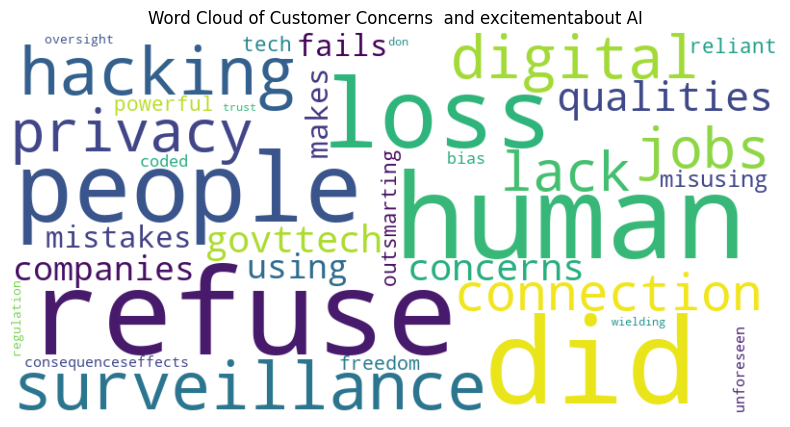

In [132]:


# Step 2: Selecting the relevant columns
excitement_cols = ["EXCITEOE_W99_OE1", "EXCITEOE_W99_OE2", "EXCITEOE_W99_OE3", "EXCITEOE_REFUSED_W99"]
concern_cols = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2", "CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]

excitement_data = df[excitement_cols].dropna()
concern_data = df[concern_cols].dropna()

# Combine all concern columns into one text corpus
concern_text = ' '.join(concern_data.values.flatten())

# Step 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)          # Remove digits
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    return text

cleaned_concern_text = clean_text(concern_text)

# Step 4: Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_words = [word for word in cleaned_concern_text.split() if word not in stop_words]

# Step 5: Create a word cloud
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Concerns  and excitementabout AI')
plt.show()





In [135]:
# Step 6: Sentiment Analysis
# Download the VADER lexicon
download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(' '.join(filtered_words))

# Display sentiment scores
print("Sentiment Scores:")
print(sentiment_scores)

Sentiment Scores:
{'neg': 0.38, 'neu': 0.522, 'pos': 0.098, 'compound': -0.9999}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alekh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


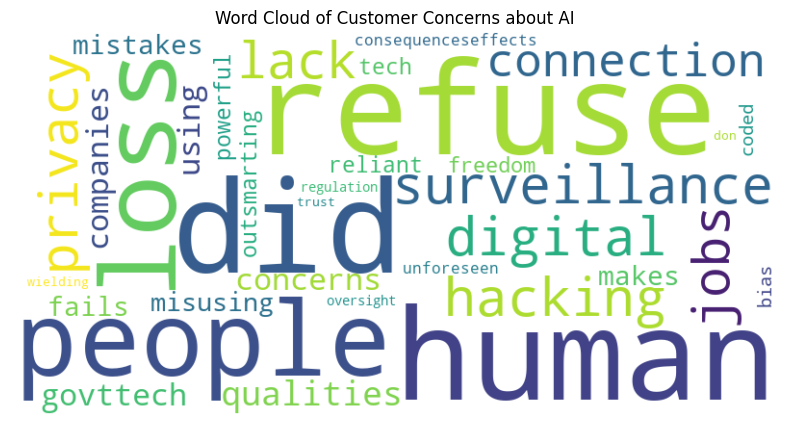

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alekh\AppData\Roaming\nltk_data...


Sentiment Scores:
{'neg': 0.38, 'neu': 0.522, 'pos': 0.098, 'compound': -0.9999}


In [134]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Step 2: Selecting the relevant columns
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1ph9qcAk_hZsUnVWmDIBgs5NF-9iX4uP3/export?format=csv")
concern_cols = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2", "CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]
concern_data = df[concern_cols].dropna()

# Combine all concern columns into one text corpus
concern_text = ' '.join(concern_data.values.flatten())

# Step 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)          # Remove digits
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    return text

cleaned_concern_text = clean_text(concern_text)

# Step 4: Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_words = [word for word in cleaned_concern_text.split() if word not in stop_words]

# Step 5: Create a word cloud
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Concerns about AI')
plt.show()

# Step 6: Sentiment Analysis
# Download the VADER lexicon
download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(' '.join(filtered_words))

# Display sentiment scores
print("Sentiment Scores:")
print(sentiment_scores)




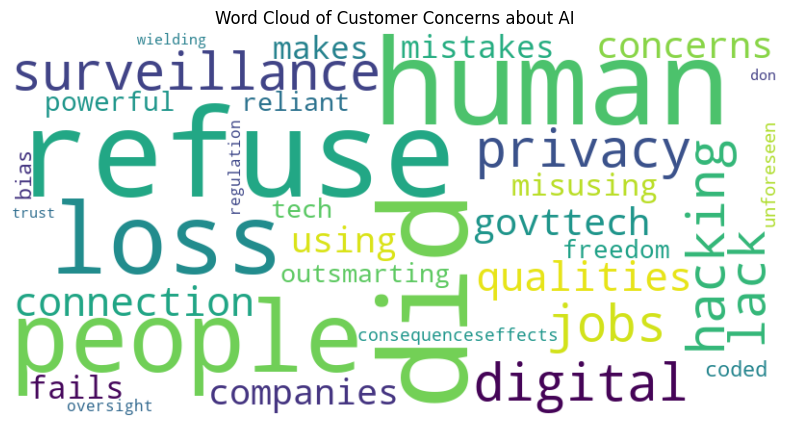

Sentiment Scores:
{'neg': 0.38, 'neu': 0.522, 'pos': 0.098, 'compound': -0.9999}


In [138]:


# Step 2: Selecting the relevant columns

concern_cols = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2", "CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]


concern_data = df[concern_cols].dropna()

# Combine all concern columns into one text corpus
concern_text = ' '.join(concern_data.values.flatten())

# Step 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)          # Remove digits
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    return text

cleaned_concern_text = clean_text(concern_text)

# Step 4: Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_words = [word for word in cleaned_concern_text.split() if word not in stop_words]

# Step 5: Create a word cloud
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Concerns about AI')
plt.show()
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(' '.join(filtered_words))

# Display sentiment scores
print("Sentiment Scores:")
print(sentiment_scores)


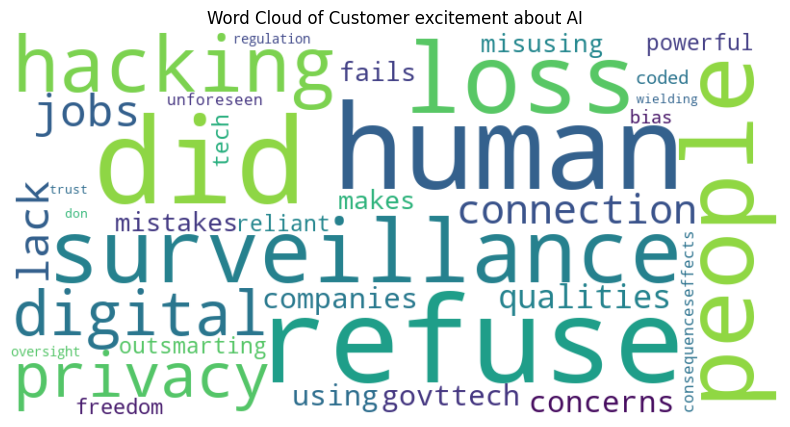

Sentiment Scores:
{'neg': 0.38, 'neu': 0.522, 'pos': 0.098, 'compound': -0.9999}


In [137]:


# Step 2: Selecting the relevant columns

excitement_cols = ["EXCITEOE_W99_OE1", "EXCITEOE_W99_OE2", "EXCITEOE_W99_OE3", "EXCITEOE_REFUSED_W99"]


excitement_data = df[excitement_cols].dropna()


# Combine all concern columns into one text corpus
concern_text = ' '.join(concern_data.values.flatten())

# Step 3: Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)          # Remove digits
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    return text

cleaned_concern_text = clean_text(concern_text)

# Step 4: Remove stop words
stop_words = set(ENGLISH_STOP_WORDS)
filtered_words = [word for word in cleaned_concern_text.split() if word not in stop_words]

# Step 5: Create a word cloud
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer excitement about AI')
plt.show()
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(' '.join(filtered_words))

# Display sentiment scores
print("Sentiment Scores:")
print(sentiment_scores)

Sentiment Scores:
{'neg': 0.38, 'neu': 0.522, 'pos': 0.098, 'compound': -0.9999}


In [ ]:
# Flatten the list of tokens
all_tokens = [token for tokens in combined_cleaned for token in tokens]

In [ ]:
all_tokens

['equally',
 'concerned',
 'excited',
 'excited',
 'concerned',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'excited',
 'concerned',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'excited',
 'concerned',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'concerned',
 'excited',
 'equally',
 'concerned',
 'excited',


In [ ]:
# Get the frequency distribution of words
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(50)  # Adjust the number of common words as needed

In [ ]:
common_words

[('concerned', 10223),
 ('excited', 10223),
 ('equally', 4597),
 ('make', 555),
 ('life', 555),
 ('society', 555),
 ('better', 555),
 ('dont', 287),
 ('knowno', 287),
 ('answer', 287),
 ('task', 219),
 ('help', 204),
 ('save', 186),
 ('time', 186),
 ('efficient', 186),
 ('inevitable', 161),
 ('progress', 161),
 ('future', 161),
 ('handle', 146),
 ('mundane', 146),
 ('tedious', 146),
 ('human', 141),
 ('ai', 82),
 ('interesting', 82),
 ('exciting', 82),
 ('worklabor', 78),
 ('difficultdangerous', 73),
 ('accurate', 68),
 ('elderlyhave', 53),
 ('disability', 53),
 ('personal', 40),
 ('anecdote', 40),
 ('refused', 37),
 ('people', 16),
 ('fear', 16),
 ('based', 16),
 ('scifi', 16),
 ('reality', 16)]

In [ ]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))

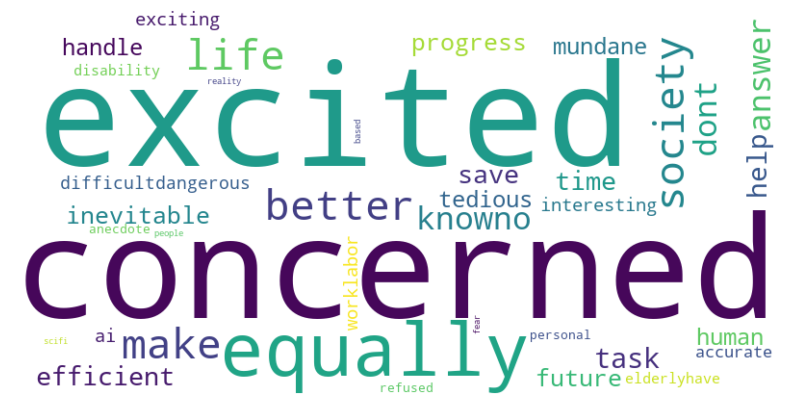

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Convert preprocessed text back to strings
combined_cleaned_str = combined_cleaned.apply(lambda x: ' '.join(x))

In [ ]:
combined_cleaned_str

0          equally concerned excited
1                  excited concerned
2          equally concerned excited
3          equally concerned excited
4          equally concerned excited
                    ...             
12108    handle mundane tedious task
12109       make life society better
12110                 help worklabor
12111              personal anecdote
12112       make life society better
Length: 12113, dtype: object

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(combined_cleaned_str)

In [ ]:
vectorizer

TfidfVectorizer(max_features=1000)

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [ ]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
terms = vectorizer.get_feature_names_out()

In [ ]:
# Get top terms per cluster
top_terms_per_cluster = []
for i in range(kmeans.n_clusters):
    top_terms = [terms[ind] for ind in cluster_centers[i].argsort()[:-11:-1]]
    top_terms_per_cluster.append(top_terms)


In [ ]:
# Print top terms per cluster
for i, top_terms in enumerate(top_terms_per_cluster):
    print(f"Cluster {i}: {', '.join(top_terms)}")

Cluster 0: equally, concerned, excited, help, task, future, progress, inevitable, human, mundane
Cluster 1: society, better, life, make, worklabor, dont, exciting, excited, equally, elderlyhave
Cluster 2: excited, concerned, worklabor, dont, future, fear, exciting, equally, elderlyhave, efficient
Cluster 3: dont, answer, knowno, worklabor, fear, exciting, excited, equally, elderlyhave, efficient
Cluster 4: time, save, efficient, dont, future, fear, exciting, excited, equally, elderlyhave


Cluster 0: Focuses on the balance of concern and excitement, particularly related to human tasks and the future.
Cluster 1: Highlights societal impacts and the potential for AI to improve life and work, with some skepticism.
Cluster 2: Combines excitement and concern about labor and efficiency, with a hint of fear about the future.
Cluster 3: Reflects mixed sentiments with an emphasis on labor concerns and unknowns.
Cluster 4: Emphasizes efficiency and time-saving aspects, with underlying concerns about the future.

Key Areas for Improvement:
Use the insights to improve product features, user experience, and communication strategies. For example, enhancing transparency about AI’s role in the future could mitigate concerns found in Cluster 0 and Cluster 3.

In [ ]:
# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

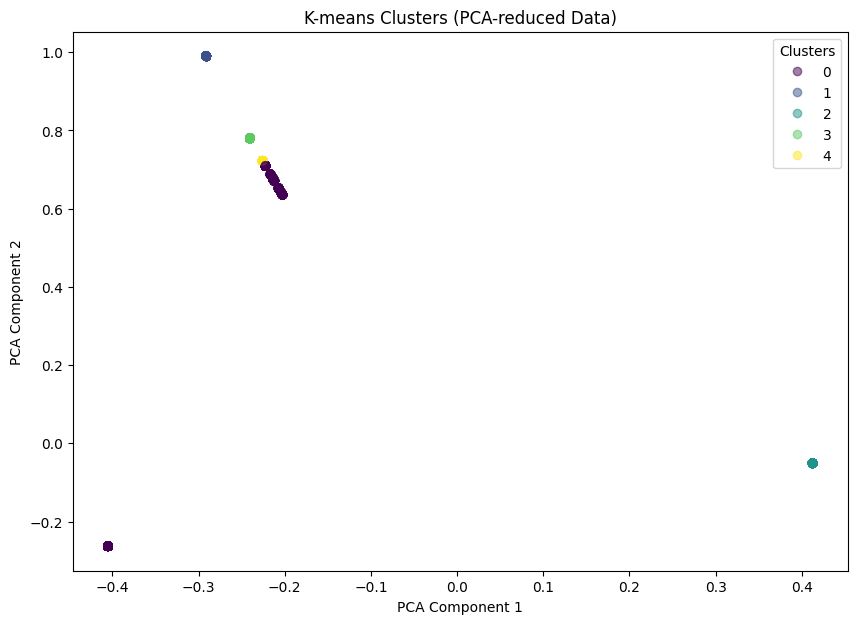

In [ ]:
# Plotting PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title("K-means Clusters (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()